### Forecast de demanda: Facturapp

#### ✅ TimeGPT

##### Datos

In [340]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
warnings.simplefilter("ignore", FutureWarning, )

In [341]:
import pandas as pd

# Rutas a los archivos CSV
clientes_path = 'C:/Others/Emprendiendo/Agencia/Bummi ai/GitHub Bummi/forecast_facturapp/csv/clientes.csv'
productos_path = 'C:/Others/Emprendiendo/Agencia/Bummi ai/GitHub Bummi/forecast_facturapp/csv/productos.csv'
ventas_path = 'C:/Others/Emprendiendo/Agencia/Bummi ai/GitHub Bummi/forecast_facturapp/csv/ventas.csv'

# Leer los archivos CSV
clientes_df = pd.read_csv(clientes_path)
productos_df = pd.read_csv(productos_path)
ventas_df = pd.read_csv(ventas_path)

In [342]:
# Crear la tabla agregada
df_timegpt = ventas_df.groupby('fecha_venta').agg(
    cantidad_ventas_producto=pd.NamedAgg(column='cantidad_ventas_producto', aggfunc='sum')
).reset_index()

# Renombramos variables para que prophet tome como input
df = df_timegpt.rename(columns={'fecha_venta': 'ds', 'cantidad_ventas_producto': 'y'})
df.head()

,ds,y
0,2022-04-16,39.000
1,2022-04-17,165.640
2,2022-04-18,2235.130
3,2022-04-19,1167.624
4,2022-04-20,1734.857


Completamos las fechas faltantes con valores nulos

In [343]:
import pandas as pd

# Supongamos que tu DataFrame original es 'df' y ya tiene la columna 'ds' con fechas
# Asegúrate de que la columna 'ds' esté en formato datetime
df['ds'] = pd.to_datetime(df['ds'])

# Crear un rango completo de fechas desde la mínima hasta la máxima fecha en tu DataFrame
full_date_range = pd.date_range(start=df['ds'].min(), end=df['ds'].max())

# Reindexar tu DataFrame usando este rango de fechas
df = df.set_index('ds').reindex(full_date_range).reset_index()

# Renombrar la columna de fechas nuevamente a 'ds'
df = df.rename(columns={'index': 'ds'})

# Llenar los valores faltantes en la columna 'y' con 0
df['y'] = df['y'].fillna(0)

# Verificar el resultado
df.head(50)  # Muestra las primeras 10 filas para verificar que se han agregado las fechas faltantes


,ds,y
0,2022-04-16,39.000
1,2022-04-17,165.640
2,2022-04-18,2235.130
3,2022-04-19,1167.624
4,2022-04-20,1734.857
5,2022-04-21,1071.296
6,2022-04-22,1497.522
7,2022-04-23,857.400
8,2022-04-24,8.000
9,2022-04-25,977.481


##### TimeGPT-1

In [207]:
import pandas as pd
from nixtla import NixtlaClient

In [208]:
# Get your API Key at dashboard.nixtla.io

# 1. Instantiate the NixtlaClient
nixtla_client = NixtlaClient(api_key = 'nixtla-tok-kBaAOIBEprApGiouqPaDWOXVoedcnK24VbizErEORaRlVNppXdsR5HHnfB9F7ZTWjEXalsVNx27YKPSk')

In [209]:
df.head()

,ds,y
0,2022-04-16,39.000
1,2022-04-17,165.640
2,2022-04-18,2235.130
3,2022-04-19,1167.624
4,2022-04-20,1734.857


In [210]:
import pandas as pd

# Si estás trabajando con la columna 'ds' en formato datetime
df['ds'] = pd.to_datetime(df['ds'])

# Resamplear los datos a la frecuencia horaria, rellenando cualquier falta con NaN
df_resampled = df.set_index('ds').resample('D').asfreq().reset_index()

# Verificar si hay NaNs en la columna 'y'
if df_resampled['y'].isnull().any():
    print("Hay valores faltantes en 'y'.")
    # Opcional: Interpolar los valores faltantes o manejarlos de otra forma
    df_resampled['y'] = df_resampled['y'].interpolate()

# Asegurarse de que 'ds' sea datetime y que no haya duplicados
df_resampled['ds'] = pd.to_datetime(df_resampled['ds'])
df = df_resampled.drop_duplicates(subset=['ds'])

Hay valores faltantes en 'y'.


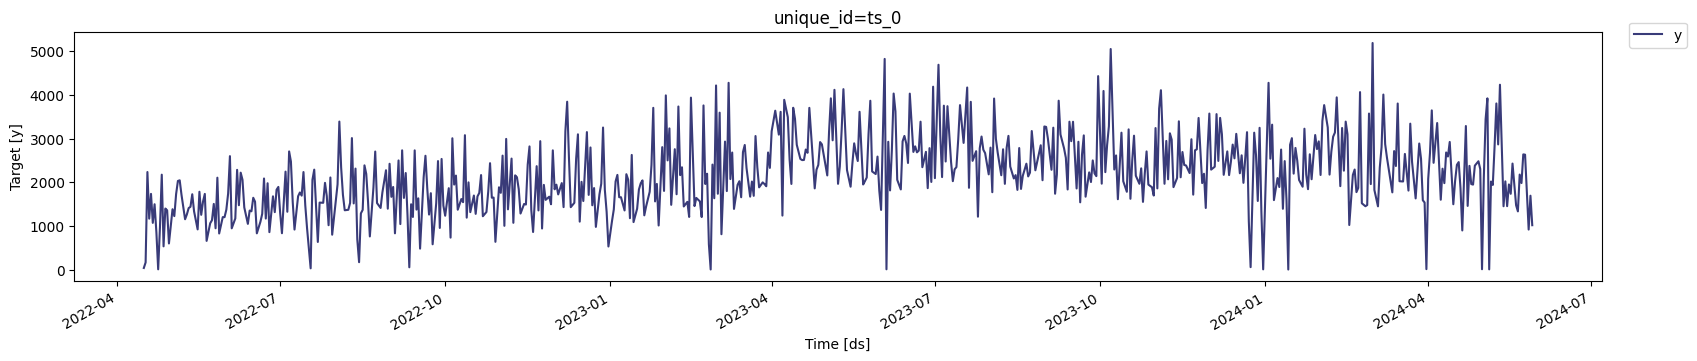

In [211]:
nixtla_client.plot(df)

In [212]:
frequency = pd.infer_freq(df['ds'])
print(f"La frecuencia de los datos es: {frequency}")

La frecuencia de los datos es: D


In [213]:
len(df)

775

In [214]:
# 3. Forecast the next 60 days
fcst_df = nixtla_client.forecast(df, 
                                 h=60, #(int) The forecast horizon. In this case, we will forecast the next 60 days.
                                 level=[90, 95, 99.5] # (list) The confidence level for the prediction intervals. 
                                 #add_history=True # to generate predictions for the historical observations too
                                 ) 

INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Inferred freq: D
INFO:nixtla.nixtla_client:Restricting input...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


In [215]:
fcst_df.head()

,ds,TimeGPT,TimeGPT-lo-99.5,TimeGPT-lo-95,TimeGPT-lo-90,TimeGPT-hi-90,TimeGPT-hi-95,TimeGPT-hi-99.5
0,2024-05-30,1813.063232,344.668347,443.043721,678.013286,2948.113178,3183.082744,3281.458118
1,2024-05-31,2270.468262,-88.947497,477.606683,748.545277,3792.391246,4063.329840,4629.884020
2,2024-06-01,2452.286133,566.943356,575.587529,595.129612,4309.442653,4328.984737,4337.628909
3,2024-06-02,1751.503662,-528.156059,-360.334664,156.715901,3346.291423,3863.341989,4031.163383
4,2024-06-03,1605.110474,157.409476,429.614351,599.852927,2610.368020,2780.606596,3052.811471


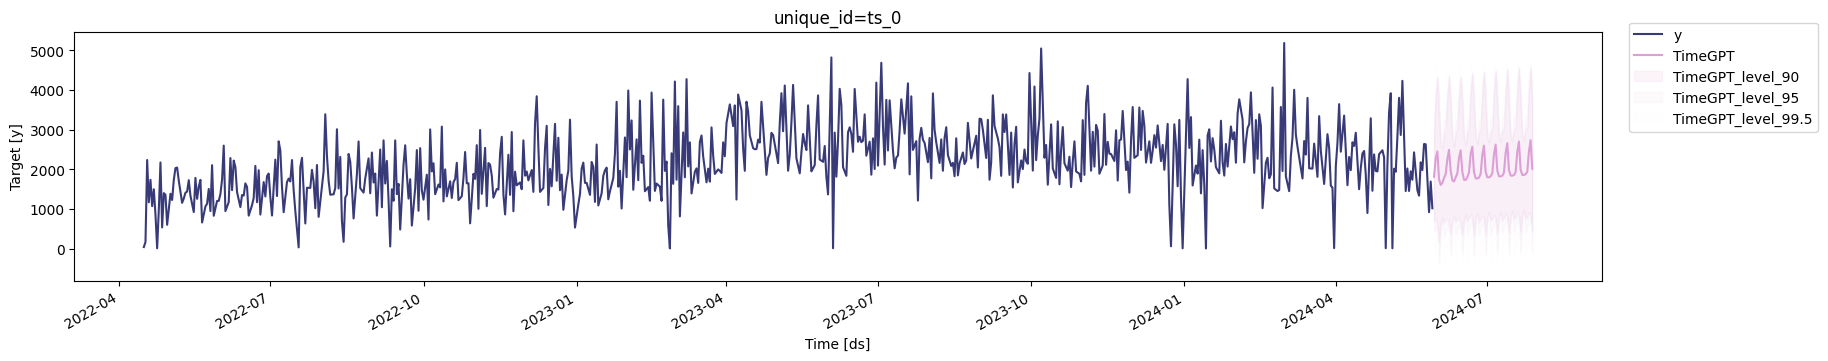

In [200]:
# 4. Plot your results (optional)
nixtla_client.plot(df, fcst_df, level=[90, 95, 99.5])

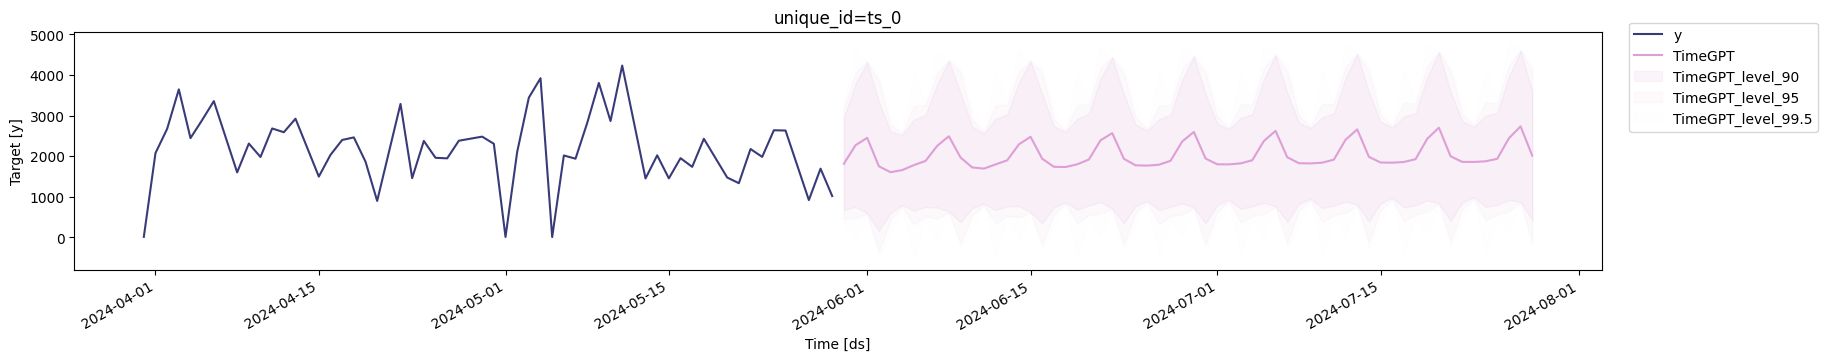

In [201]:
nixtla_client.plot(df, fcst_df, level=[90, 95, 99.5], max_insample_length=60)

##### Vacaciones y fechas especiales + feature importance

Para el marco de datos de entrada

In [344]:
import pandas as pd
from nixtla import NixtlaClient
from nixtla.date_features import CountryHolidays
from nixtla.date_features import SpecialDates

# Rango de fechas para generar vacaciones y fechas especiales
start_date = '2022-04-16'
end_date = '2024-05-29'

# Generar el rango de fechas
dates = pd.date_range(start=start_date, end=end_date)

# Obtener vacaciones para el país UY
c_holidays = CountryHolidays(countries=['UY'])
holidays_df = c_holidays(dates)

# Especificar tus propias fechas especiales
special_dates = SpecialDates(
    special_dates={
        'Important Dates': ['2022-04-16'],
        'Very Important Dates': ['2022-04-18']
    }
)
special_dates_df = special_dates(dates)

# Convertir a DataFrame y ajustar la columna 'ds'
holidays_df = holidays_df.reset_index(names='ds')
holidays_df['ds'] = pd.to_datetime(holidays_df['ds'])
special_dates_df = special_dates_df.reset_index(names='ds')
special_dates_df['ds'] = pd.to_datetime(special_dates_df['ds'])

# Convertir la columna 'ds' a datetime
df['ds'] = pd.to_datetime(df['ds'])

# Hacemos el merge
df = df.merge(holidays_df, on='ds', how='left')
df = df.merge(special_dates_df, on='ds', how='left')


In [345]:
df.head()

,ds,y,UY_Año Nuevo,UY_Día de los Trabajadores,UY_Jura de la Constitución,UY_Declaratoria de la Independencia,UY_Día de la Familia,Important Dates,Very Important Dates
0,2022-04-16,39.000,0,0,0,0,0,1,0
1,2022-04-17,165.640,0,0,0,0,0,0,0
2,2022-04-18,2235.130,0,0,0,0,0,0,1
3,2022-04-19,1167.624,0,0,0,0,0,0,0
4,2022-04-20,1734.857,0,0,0,0,0,0,0


Para el marco de datos futuro

In [348]:
# Create future dataframe with exogenous features

start_date = '2024-05-30'
dates = pd.date_range(start=start_date, periods=60, freq='D')

dates = dates.to_period('D').to_timestamp('D')

future_df = pd.DataFrame(dates, columns=['ds'])

In [349]:
from nixtla.date_features import CountryHolidays

uy_holidays = CountryHolidays(countries=['UY'])
dates = pd.date_range(start=future_df.iloc[0]['ds'], end=future_df.iloc[-1]['ds'], freq='D')
holidays_df = uy_holidays(dates)
monthly_holidays = holidays_df.resample('d').max()

monthly_holidays = monthly_holidays.reset_index(names='ds')

future_df = future_df.merge(monthly_holidays)

future_df.head()

,ds,UY_Año Nuevo,UY_Día de los Trabajadores,UY_Jura de la Constitución,UY_Declaratoria de la Independencia,UY_Día de la Familia
0,2024-05-30,0,0,0,0,0
1,2024-05-31,0,0,0,0,0
2,2024-06-01,0,0,0,0,0
3,2024-06-02,0,0,0,0,0
4,2024-06-03,0,0,0,0,0


In [352]:
df.head()

,ds,y,UY_Año Nuevo,UY_Día de los Trabajadores,UY_Jura de la Constitución,UY_Declaratoria de la Independencia,UY_Día de la Familia,Important Dates,Very Important Dates
0,2022-04-16,39.000,0,0,0,0,0,1,0
1,2022-04-17,165.640,0,0,0,0,0,0,0
2,2022-04-18,2235.130,0,0,0,0,0,0,1
3,2022-04-19,1167.624,0,0,0,0,0,0,0
4,2022-04-20,1734.857,0,0,0,0,0,0,0


In [353]:
fcst_df = nixtla_client.forecast(
    df=df,
    h=60,
    freq='D',
    time_col='ds',
    target_col='y',
    X_df=future_df

INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Using the following exogenous variables: UY_Año Nuevo, UY_Día de los Trabajadores, UY_Jura de la Constitución, UY_Declaratoria de la Independencia, UY_Día de la Familia
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


In [359]:
fcst_df.head()

,ds,TimeGPT
0,2024-05-30,1787.047322
1,2024-05-31,2538.473773
2,2024-06-01,2571.079200
3,2024-06-02,-90.304641
4,2024-06-03,786.669248


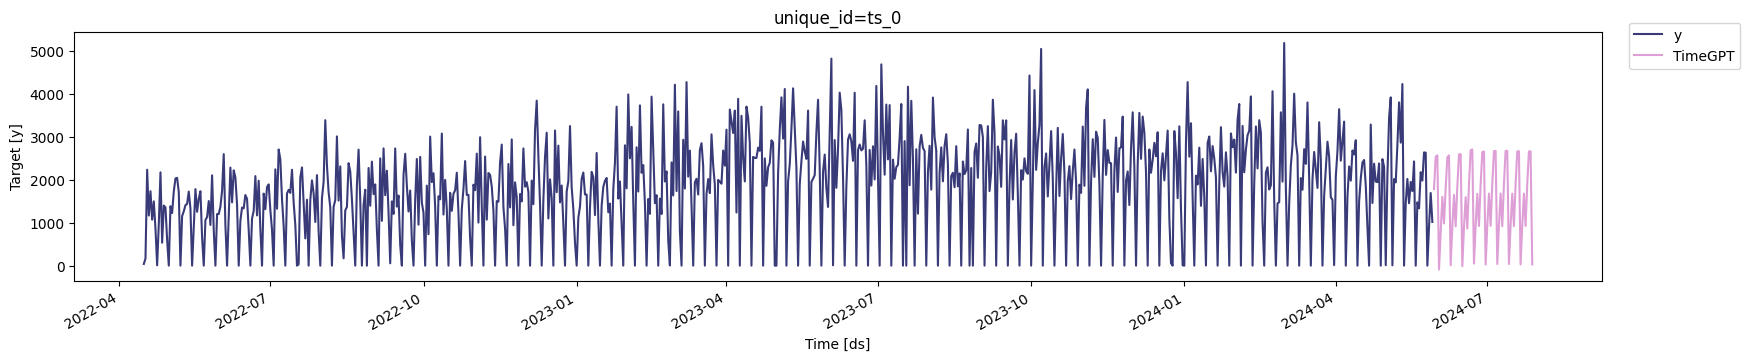

In [354]:
nixtla_client.plot(
    df, 
    fcst_df, 
    time_col='ds',
    target_col='y',
)

<Axes: ylabel='features'>

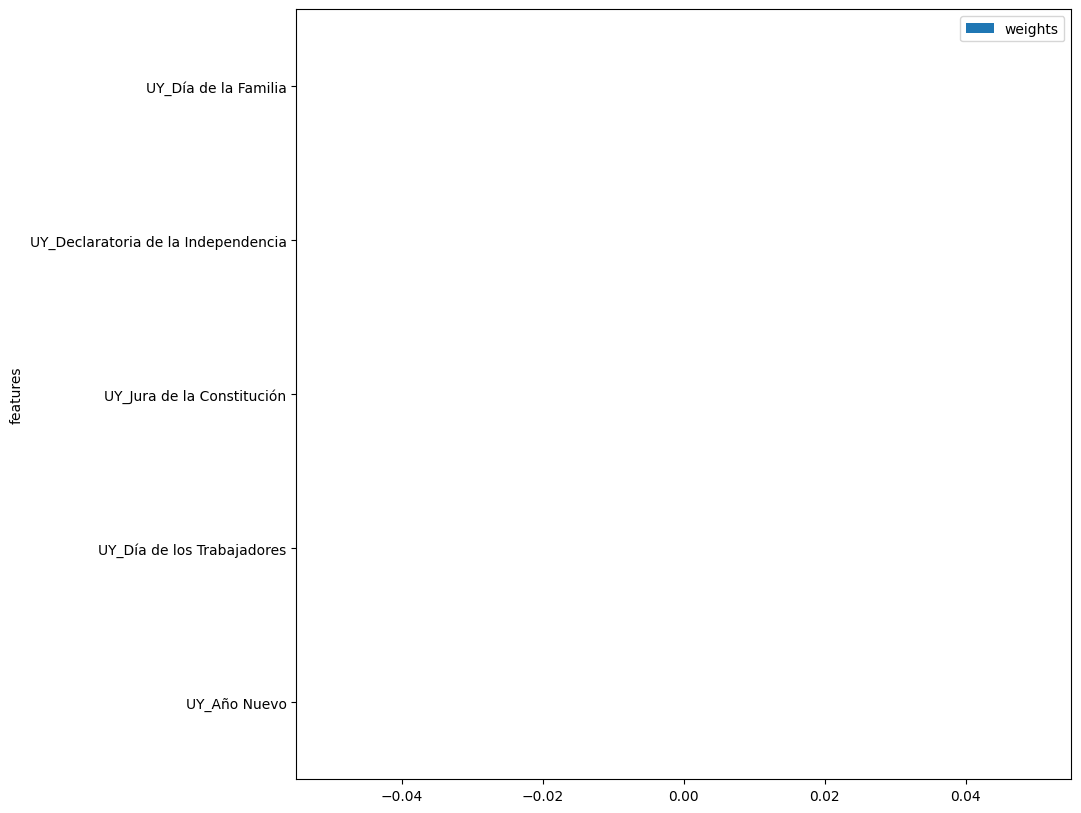

In [355]:
nixtla_client.weights_x.plot.barh(x='features', y='weights', figsize=(10, 10))

##### Feature importance

In [ ]:
nixtla_client.weights_x.plot.barh(x='ds', y='y', color='blue', figsize=(10, 6)) #ver, esto es para feature importance

##### Train & Test

In [168]:
# Número de datos que quieres usar como test_df
n_test = 60

# Dividir el dataframe
input_df = df.iloc[:-n_test]
test_df = df.iloc[-n_test:]

# Mostrar los resultados
print("Input DF:")
print(input_df.tail())  # Muestra las últimas filas de input_df

print("\nTest DF:")
print(test_df.head())  # Muestra las primeras filas de test_df

Input DF:
                       ds            y
18512 2024-05-26 08:00:00  1489.666000
18513 2024-05-26 09:00:00  1453.956437
18514 2024-05-26 10:00:00  1418.246875
18515 2024-05-26 11:00:00  1382.537312
18516 2024-05-26 12:00:00  1346.827750

Test DF:
                       ds            y
18517 2024-05-26 13:00:00  1311.118187
18518 2024-05-26 14:00:00  1275.408625
18519 2024-05-26 15:00:00  1239.699062
18520 2024-05-26 16:00:00  1203.989500
18521 2024-05-26 17:00:00  1168.279937


In [169]:
fcst_df = nixtla_client.forecast(
    df=input_df,
    h=60,                            
    level=[95],                        # Generate a 95% confidence interval
    finetune_steps=10,                 # Specify the number of steps for fine-tuning
    finetune_loss='mae',               # Use the MAE as the loss function for fine-tuning
    model='timegpt-1-long-horizon',    # Use the model for long-horizon forecasting
    time_col='ds',
    target_col='y',
    id_col='unique_id'
)

INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Inferred freq: h
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


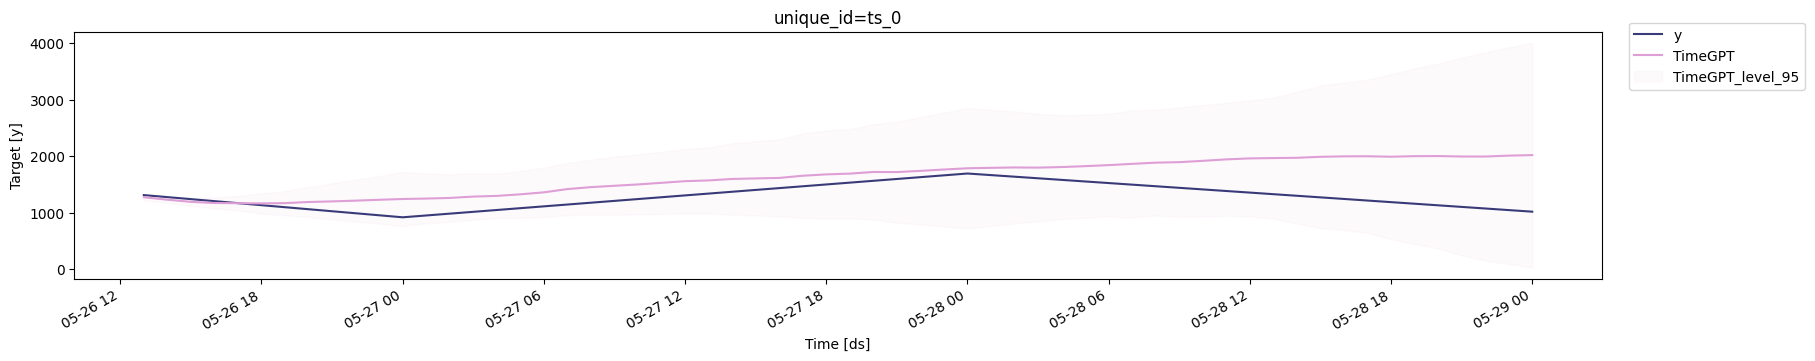

In [170]:
nixtla_client.plot(test_df, fcst_df, models=['TimeGPT'], level=[95], time_col='ds', target_col='y')

In [172]:
fcst_df['ds'] = pd.to_datetime(fcst_df['ds'])

test_df = pd.merge(test_df, fcst_df, 'left', ['ds'])

In [177]:
evaluation = evaluate(
    test_df,
    metrics=[mae],
    models=["TimeGPT"],
    target_col="y",
    id_col='unique_id'
)

average_metrics = evaluation.groupby('metric')['TimeGPT'].mean()
average_metrics

KeyError: 'unique_id'

##### CV

In [104]:
timegpt_cv_df = nixtla_client.cross_validation(
    df, 
    h=7, 
    n_windows=8, 
    time_col='ds', 
    target_col='y', 
    freq='D',
    level=[80, 90, 99.5]
)
timegpt_cv_df.head()

INFO:nixtla.nixtla_client:Validating inputs...
c:\Users\Juancito\AppData\Local\Programs\Python\Python311\Lib\site-packages\utilsforecast\preprocessing.py:193: UserWarning: Some values were lost during filling, please make sure that all your times meet the specified frequency.
For example if you have 'W-TUE' as your frequency, make sure that all your times are actually Tuesdays.
  warnings.warn(
INFO:nixtla.nixtla_client:Restricting input...
INFO:nixtla.nixtla_client:Calling Cross Validation Endpoint...


,ds,cutoff,y,TimeGPT,TimeGPT-lo-99.5,TimeGPT-lo-90,TimeGPT-lo-80,TimeGPT-hi-80,TimeGPT-hi-90,TimeGPT-hi-99.5
0,2024-04-04,2024-04-03,2445.827,2772.181152,1449.600200,1747.986974,1977.339746,3567.022558,3796.375331,4094.762105
1,2024-04-05,2024-04-03,2890.433,2628.787109,240.942109,896.845335,1170.977971,4086.596247,4360.728884,5016.632110
2,2024-04-06,2024-04-03,3356.566,2324.880615,492.414530,701.089838,992.272431,3657.488800,3948.671393,4157.346700
3,2024-04-07,2024-04-03,2478.699,1877.399658,-382.219900,352.832817,609.764698,3145.034619,3401.966500,4137.019216
4,2024-04-08,2024-04-03,1600.832,2019.586060,1082.192071,1090.179265,1118.899106,2920.273013,2948.992854,2956.980048


##### Metrics - MSE and RMSE

,actual,predicted
55,2632.3720,1874.294800
56,1775.3425,1935.115234
57,918.3130,2442.376221
58,1692.8850,2734.295166
59,1017.7850,2014.655762


Mean Squared Error (MSE): 980123.845228629
Root Mean Squared Error (RMSE): 990.012042971513


ValueError: x and y must have same first dimension, but have shapes (775,) and (60,)

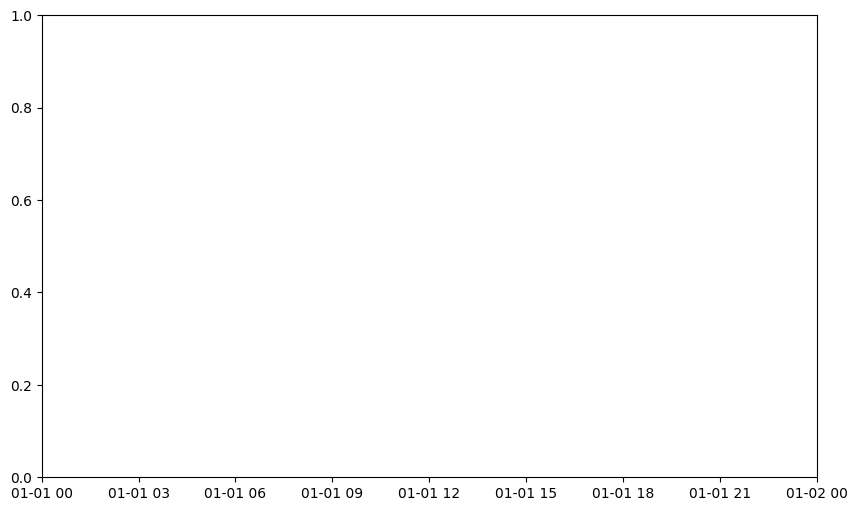

In [222]:
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Extraer los valores reales y predichos para el cálculo del RMSE
y_true = df['y'].values[-60:]
#y_true = df['y'].values  # Valores reales de ventas
y_pred = fcst_df['TimeGPT'].iloc[:len(y_true)].values  # Predicciones del modelo

df_comparison = pd.DataFrame({
    'actual': y_true,
    'predicted': y_pred
})

# Si estás utilizando un entorno como Jupyter, puedes usar display para un mejor formato
from IPython.display import display
display(df_comparison.tail(5))

# Mostrar las métricas de error
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Graficar las predicciones vs los valores reales (opcional)
plt.figure(figsize=(10, 6))
plt.plot(df['ds'], y_true, label='Actual')
plt.plot(df['ds'], y_pred, label='Predicted', linestyle='--')
plt.title('TimeGPT Forecast vs Actual Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

##### Otras métricas

In [175]:
from utilsforecast.losses import mae, rmse
from utilsforecast.evaluation import evaluate

In [362]:
df_target = df[['ds', 'y']].query("ds >= '2024-05-30' & ds <= '2024-07-28'")

In [364]:
# Merge forecasts with target dataframe
df_target = df_target.merge(fcst_df[['ds', 'TimeGPT']])

In [376]:
import pandas as pd

# Crear el DataFrame manualmente con los datos proporcionados
data = {
    'ds': [
        '30/5/2024', '31/5/2024', '1/6/2024', '2/6/2024', '3/6/2024', '4/6/2024', '5/6/2024', 
        '6/6/2024', '7/6/2024', '8/6/2024', '9/6/2024', '10/6/2024', '11/6/2024', '12/6/2024',
        '13/6/2024', '14/6/2024', '15/6/2024', '16/6/2024', '17/6/2024', '18/6/2024', '19/6/2024',
        '20/6/2024', '21/6/2024', '22/6/2024', '23/6/2024', '24/6/2024', '25/6/2024', '26/6/2024', 
        '27/6/2024', '28/6/2024', '29/6/2024', '30/6/2024', '1/7/2024', '2/7/2024', '3/7/2024',
        '4/7/2024', '5/7/2024', '6/7/2024', '7/7/2024', '8/7/2024', '9/7/2024', '10/7/2024',
        '11/7/2024', '12/7/2024', '13/7/2024', '14/7/2024', '15/7/2024', '16/7/2024', '17/7/2024', 
        '18/7/2024', '19/7/2024', '20/7/2024', '21/7/2024', '22/7/2024', '23/7/2024', '24/7/2024',
        '25/7/2024', '26/7/2024', '27/7/2024', '28/7/2024'
    ],
    'y': [
        1.912, 2.046, 2.189, 2.342, 2.506, 2.682, 2.870, 3.070, 3.285, 3.515, 3.761, 4.025, 4.307, 
        4.608, 4.931, 5.276, 5.645, 6.040, 6.463, 6.915, 7.399, 7.917, 8.472, 9.065, 9.699, 2.046, 
        2.189, 2.342, 2.506, 2.682, 2.870, 3.070, 3.285, 3.515, 3.761, 4.025, 4.307, 4.608, 4.931, 
        5.276, 5.645, 6.040, 6.463, 6.915, 7.399, 7.917, 8.472, 9.065, 9.699, 10.378, 11.104, 
        11.882, 12.714, 2.046, 2.189, 2.342, 2.506, 2.682, 2.870, 3.070
    ],
    'TimeGPT': [
        1.808, 1.935, 2.071, 2.215, 2.371, 2.537, 2.714, 2.904, 3.107, 3.325, 3.558, 3.807, 4.073,
        4.358, 4.663, 4.990, 5.339, 5.713, 6.113, 6.540, 6.998, 7.488, 8.012, 8.573, 9.173, 1.935,
        2.071, 2.215, 2.371, 2.537, 2.714, 2.904, 3.107, 3.325, 3.558, 3.807, 4.073, 4.358, 4.663,
        4.990, 5.339, 5.713, 6.113, 6.540, 6.998, 7.488, 8.012, 8.573, 9.173, 9.815, 10.503, 
        11.238, 12.024, 1.935, 2.071, 2.215, 2.371, 2.537, 2.714, 2.904
    ]
}

# Crear DataFrame
df_target = pd.DataFrame(data)

# Mostrar DataFrame
df_target.head()


,ds,y,TimeGPT
0,30/5/2024,1.912,1.808
1,31/5/2024,2.046,1.935
2,1/6/2024,2.189,2.071
3,2/6/2024,2.342,2.215
4,3/6/2024,2.506,2.371


In [375]:
#import numpy as np
#df_target['unique_id'] = df_target.index
#mae_timegpt = mae(df=df_target, models=['TimeGPT'], target_col='y')
#np.mean(mae_timegpt['TimeGPT'])

y_true = df_target['y']
y_pred = df_target['TimeGPT']

# Mostrar las métricas de error
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Squared Error (MSE): 0.09854833333333322
Root Mean Squared Error (RMSE): 0.31392408848849623


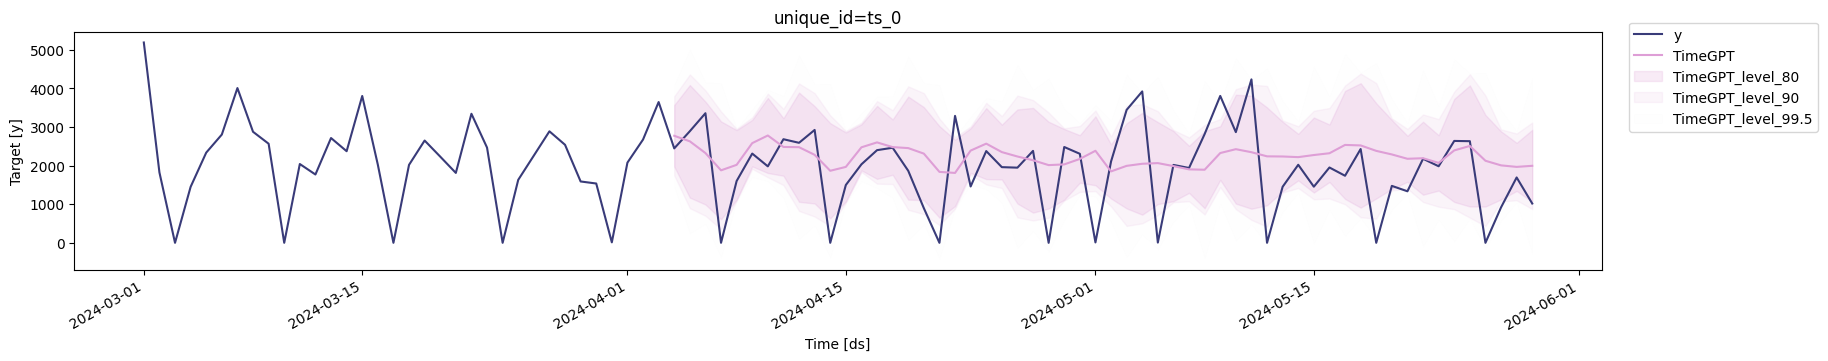

In [373]:
nixtla_client.plot(
    df, 
    timegpt_cv_df.drop(columns=['cutoff', 'y']), 
    time_col='ds',
    target_col='y',
    max_insample_length=90, 
    level=[80, 90, 99.5]
)

##### Fine-tuning

In [ ]:
test_df = df.groupby('unique_id').tail(96)                                                             # 96 = 2 days (96 * 0.5h *  1 day/24h )

input_df = df.groupby('unique_id').apply(lambda group: group.iloc[-1104:-96]).reset_index(drop=True)   # 1008 = 21 days (1008 *0.5h * 1 day/24h)

In [128]:
fcst_df = nixtla_client.forecast(
    df=df,
    h=60,                            
    level=[90],                        # Generate a 90% confidence interval
    finetune_steps=10,                 # Specify the number of steps for fine-tuning
    finetune_loss='rmse',              # Use the MAE as the loss function for fine-tuning
    model='timegpt-1-long-horizon',    # Use the model for long-horizon forecasting
    time_col='ds',
    target_col='y'
)

INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Inferred freq: h
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


Time (TimeGPT): 7.074298620223999


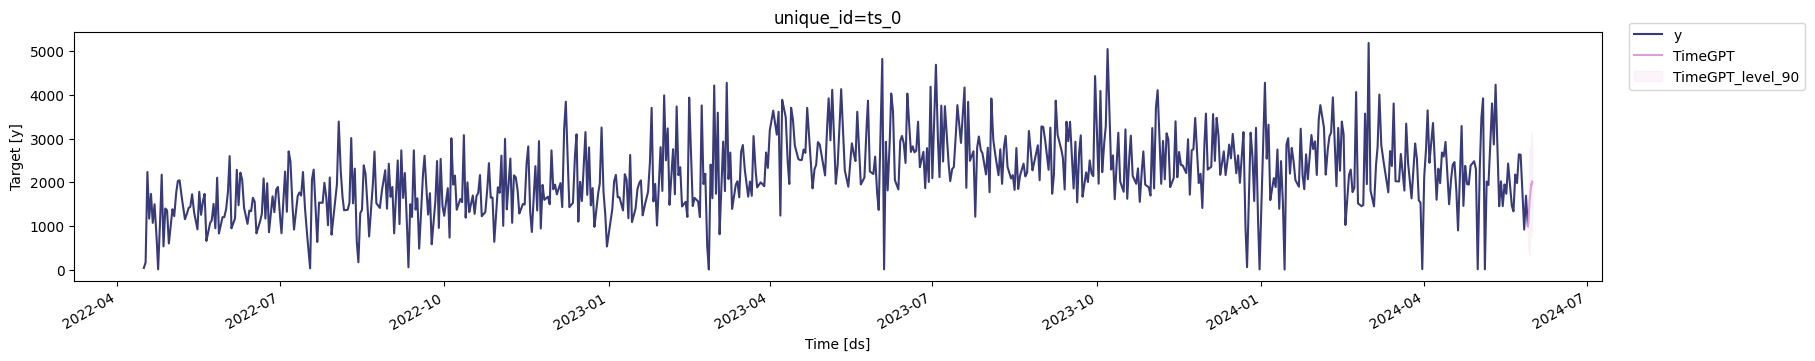

In [129]:
nixtla_client.plot(df, fcst_df, models=['TimeGPT'], level=[90], time_col='ds', target_col='y')

In [131]:
evaluation = mae(df, models=['TimeGPT'], id_col='unique_id', target_col='y')

print(evaluation)

KeyError: "None of [Index(['TimeGPT'], dtype='object')] are in the [columns]"